In [1]:
#get dependency
import PIL
import json
import torch
import scipy
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

!pip install boto3
!pip install botocore

#dependency for downloading COCO dataset

import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.5 MB/s eta 0:00:00


In [2]:
# download  the SVHN dataset

!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat





--2024-04-19 14:20:28--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  10.8MB/s    in 15s     

2024-04-19 14:20:43 (11.9 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2024-04-19 14:20:43--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  11.7MB/s    in 8.0s    

2024-04-19 14:20:51 (7.65 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [3]:
# read the SVHN dataset

train = scipy.io.loadmat('train_32x32.mat')
test = scipy.io.loadmat('test_32x32.mat')

In [4]:
files = [ 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

DownloadingDownloading  annotations_trainval2017.ziptrain2017.zip

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets


In [5]:
# open a json file
annotation_json = open ("/content/annotations/person_keypoints_train2017.json")

# return the dict obj from JSON
data = json.load(annotation_json)


In [ ]:
ls

annotations/                  sample_data/    test_32x32.mat.1  train2017.zip    train_32x32.mat.1
annotations_trainval2017.zip  test_32x32.mat  train2017/        train_32x32.mat


In [6]:
data_file = "/content/annotations/person_keypoints_train2017.json"

In [7]:
sk = data["categories"][0]["skeleton"]

In [8]:
keypoints_label = data["categories"][0]["keypoints"]

print(keypoints_label)

['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']


In [9]:
# fxn to get image info
def getImageInfo(target_input , input_datafile):

  try:
    annotation_json = open (input_datafile)
    data = json.load(annotation_json)

    input_image_name = data['images'][target_input]['file_name']
    input_target_image_directory = "/content/train2017" +"/" + input_image_name

    input_image_id = data["images"][target_input]["id"]

    input_im = PIL.Image.open(input_target_image_directory)

    plt.imshow(input_im)

    # get the annotation info of the input image
    indexList = []
    for  a in data['annotations']:
      indexList.append(a["image_id"])

    # find the correct index for annotation
    try:
      target_annnotations_id =  indexList.index(input_image_id)
      input_bbox_info = data['annotations'][target_annnotations_id]['bbox']
      #input_x_start,input_y_start ,input_bb_width,input_bb_height = input_bbox_info
      key_point_output = data['annotations'][target_annnotations_id]['keypoints']
      output_bbox = input_bbox_info
    except:
      print("Do not have bbox")
      output_bbox = []
      key_point_output = []


  except:
    print("something wrong .Please check !")
    plt.plot()
  return input_im , output_bbox , key_point_output



[42.9, 2.32, 419.76, 506.72]
[275, 98, 2, 306, 68, 2, 247, 68, 2, 349, 84, 2, 195, 79, 2, 379, 223, 2, 141, 225, 2, 432, 435, 2, 70, 444, 2, 377, 321, 2, 231, 431, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


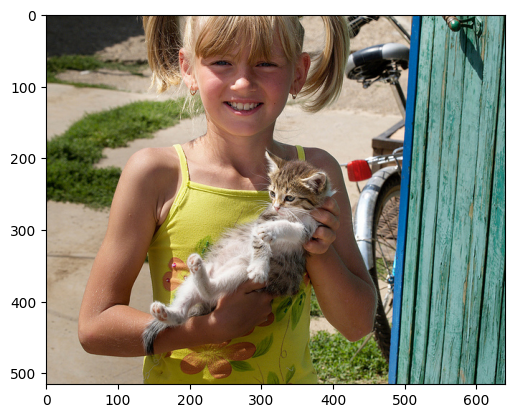

In [10]:
image_output , image_bbox , keypoint_output = getImageInfo(31,data_file)

print(image_bbox)
print(keypoint_output)

In [11]:
# fxn for lay bbox on an image

def getBbox ( image , bbox_info):

  new_output_image = []

  try:
    width , height = image.size
    input_bbox_info = bbox_info
    input_x_start,input_y_start ,input_bb_width,input_bb_height = input_bbox_info

    input_fig ,input_ax = plt.subplots()


    #Display the image
    input_ax.imshow(image)
    input_ax.add_patch(matplotlib.patches.Rectangle((input_x_start,input_y_start),input_bb_width,input_bb_height, linewidth=1, edgecolor='r', facecolor='none'))
    plt.axis('off')
   # input_fig.canvas.draw()
   # image_array = np.array(input_fig.canvas.renderer.buffer_rgba())
    output_directory = "/content/image_withbbox.jpg"
     # Turn off axis numbers and ticks
  #https://www.geeksforgeeks.org/hide-axis-borders-and-white-spaces-in-matplotlib/
    #plt.imsave(output_directory , image_array)
    plt.savefig(output_directory,bbox_inches='tight', pad_inches = 0)

    # return the bboxed image :
    output_image = PIL.Image.open(output_directory)
    new_output_image = output_image.resize((width,height))
  #  new_output_image = output_image.crop(input_x_start , input_y_start+input_bb_height,input_x_start+input_bb_width,input_y_start)

    new_output_image.save(output_directory)

#    input_ax.imshow(output_image)
    print("image saved at /content/image_withbbox.jpg .")
  except:
    print(" No BBox ")
    input_fig ,input_ax = plt.subplots()


    #Display the image
    input_ax.imshow(image)

  return new_output_image
#plt.show()




In [12]:
# fxn for resize an image

def resizeImage ( image ,name = ""):

  new_output_image = []

  try :
    width , height = 192 ,256
    input_image = image
    new_image = input_image.resize((width, height))
  #new_image = input_image
    input_fig ,input_ax = plt.subplots()
    input_ax.imshow(new_image)

    output_directory_part1 = "/content/resized_image"
    output_directory_part2 = ".jpg"

    output_directory = output_directory_part1 + name + output_directory_part2

    plt.axis('off')
    plt.savefig(output_directory,bbox_inches='tight', pad_inches = 0)

    # return the resize image :
    output_image = PIL.Image.open(output_directory)
    new_output_image = output_image.resize((width,height))
    # crop the image



    new_output_image.save(output_directory)

  except :
    print("no image , please check ")
  return new_output_image

In [16]:
image_bbox

[42.9, 2.32, 419.76, 506.72]

In [38]:
def cropImage(image, bbox ):

  new_output_image = []

 # input_x_start,input_y_start ,input_bb_width,input_bb_height = bbox

  #matplotlib.patches.Rectangle((input_x_start,input_y_start),input_bb_width,input_bb_height, linewidth=1, edgecolor='r', facecolor='none')

  try:
    width , height = image.size

    input_x_start,input_y_start ,input_bb_width,input_bb_height = bbox

    new_output_image = image.crop((input_x_start,input_y_start ,input_x_start + input_bb_width ,input_y_start+input_bb_height ))

    input_fig ,input_ax = plt.subplots()
    input_ax.imshow(new_output_image)



    output_directory = "/content/cropped_image.jpg"

    plt.axis('off')
    plt.savefig(output_directory,bbox_inches='tight', pad_inches = 0)

    # return the resize image :
    output_image = PIL.Image.open(output_directory)
    new_output_image = output_image.resize((int(input_bb_width),int(input_bb_height)))
    # crop the image



    new_output_image.save(output_directory)


  except:


    print("no image ,please check")

  return new_output_image






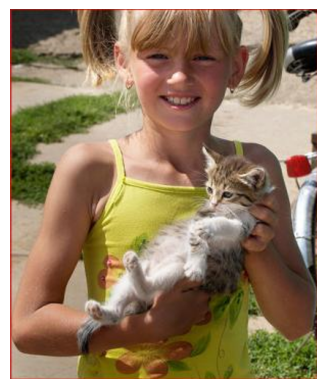

In [42]:
a = cropImage(output_image,image_bbox)

image saved at /content/image_withbbox.jpg .


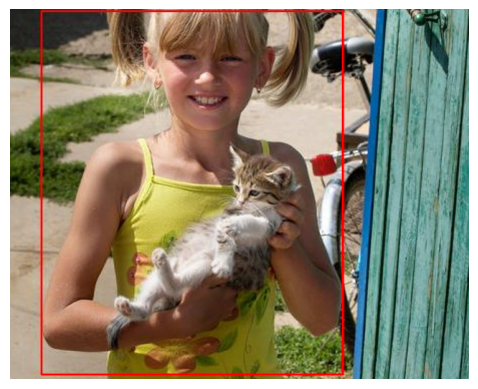

In [18]:
output_image = getBbox(image_output , image_bbox)
plt.imshow(output_image)

In [ ]:
input_test = PIL.Image.open("/content/image_withbbox.jpg")

resizeImage(input_test,"_with_bbox")

In [61]:
# fxn for lay key point on an image
def get_keypoint( image , key_point , key_point_label):

 # width , height = image.size
#  print((width,height))
  final_output_image = []
 # print(key_point)
  try:
    width , height = image.size
    x_raw = key_point[0::3]
    y_raw = key_point[1::3]

    x= [ x for x in x_raw if x > 0]
    y = [ y for y in y_raw if y > 0]

    plt.imshow(image)
    plt.scatter(x,y)

  #print("len(key_point_label)" , len(key_point_label))
    for i in range(len(key_point_label)):
      if ( x_raw[i] != 0 and y_raw[i] != 0 ):

        plt.text(x_raw[i], y_raw[i], key_point_label[i], fontsize = 3)
    #print("test point f")
#box = (input_x_start,0 ,input_x_start + input_bb_width, input_bb_height )

#crop_im = input_im.crop(box)
#new_image = crop_im.resize((192,256))

#plt.imshow(new_image)
  #plt.show()


  #plt.axis('off')
    #input_fig.canvas.draw()
    #image_array = np.array(input_fig.canvas.renderer.buffer_rgba())
    output_directory = "/content/image_with_keypoint.jpg"
     # Turn off axis numbers and ticks
  #https://www.geeksforgeeks.org/hide-axis-borders-and-white-spaces-in-matplotlib/
    #plt.imsave(output_directory , image_array)
 # print("test point s")
    plt.savefig(output_directory ,bbox_inches='tight',pad_inches = 0)

    # return the bboxed image :
    output_keypoint_image = PIL.Image.open(output_directory)
  #print("test point y")
    final_output_image = output_keypoint_image.resize((width,height))
    final_output_image.save(output_directory)
    print("image saved at /content/image_withkeypoint.jpg")


  except:
    print("no key point")

  return final_output_image



In [62]:
# fxn for lay key point on an image

def get_skeleton(image , skeleton ,key_point):

  new_output_image = []
 # width , height = image.size
 # print(width , height)
  try:

    width , height = image.size
    print(width , height)
    x_key_point = key_point[0::3]
    y_key_point = key_point[1::3]
    sk_key_point_list = []
    key_points = []
    for s in skeleton:
      for a in s:
        target_point = a - 1
        key_points.append(x_key_point[target_point])
        key_points.append(y_key_point[target_point])
  #      print(key_points)
      #print(y_key_point[target_point])
    sk_key_point_list.append(key_points)


    sk_x_key_point_raw = sk_key_point_list[0][0::2]
    sk_y_key_point_raw = sk_key_point_list[0][1::2]

    sk_x_key_point = [ x for x in sk_x_key_point_raw if x > 0]
    sk_y_key_point = [ y for y in sk_y_key_point_raw if y > 0]


   # plt.scatter(sk_x_key_point,y)
    plt.plot(sk_x_key_point,sk_y_key_point,color = "pink" ,linewidth = 1.1)

    plt.imshow(image)
#box = (input_x_start,input_y_start ,input_x_start + input_bb_width, input_bb_height )

#crop_im = input_im.crop(box)
  #new_image = crop_im.resize((192,256))
# need to pre-process thhe sk_key_point : if x, y is 0,0 then omit this point
#plt.imshow(new_image)
#plt.show()

    output_directory = "/content/image_withskeleton.jpg"
     # Turn off axis numbers and ticks
  #https://www.geeksforgeeks.org/hide-axis-borders-and-white-spaces-in-matplotlib/
    #plt.imsave(output_directory , image_array)
    plt.savefig(output_directory ,bbox_inches='tight',pad_inches = 0)

    # return the bboxed image :
    output_image = PIL.Image.open(output_directory)
    new_output_image = output_image.resize((width,height))
    print("the new sk imaage is of size " , width, height)
    new_output_image.save(output_directory)

    print("image saved at /content/image_withskeleton.jpg")




  except:
    print("no key point")

  return new_output_image


In [ ]:
plt.imshow(r_image)

image saved at /content/image_withbbox.jpg .
image saved at /content/image_withkeypoint.jpg
640 360
the new sk imaage is of size  640 360
image saved at /content/image_withskeleton.jpg


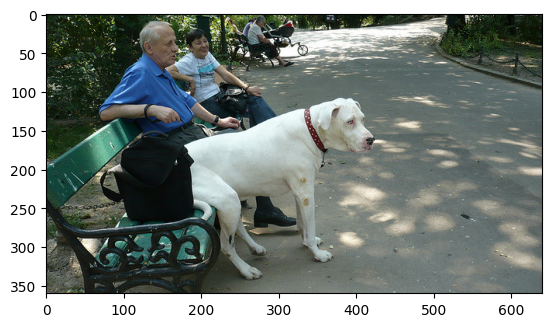

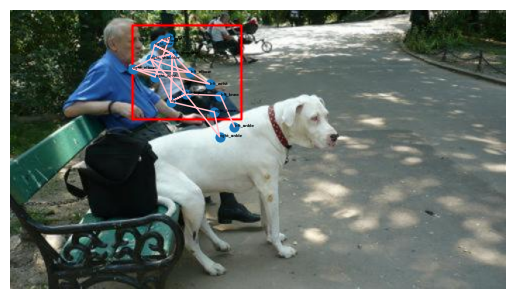

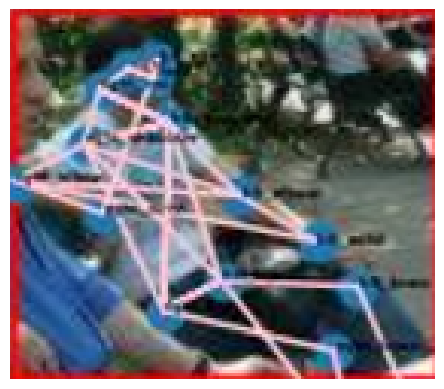

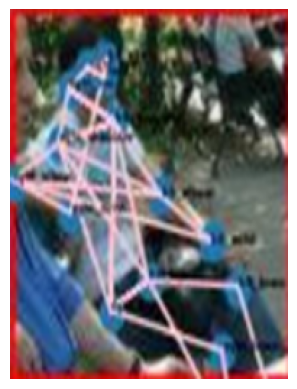

In [63]:
#Test point
input = 150
image_output , image_bbox , keypoint_output = getImageInfo(input,data_file)
output_image = getBbox(image_output , image_bbox)
k_image = get_keypoint(output_image,keypoint_output,keypoints_label)
s_image = get_skeleton(k_image,sk,keypoint_output)

c_image =cropImage(s_image,image_bbox)

r_image = resizeImage(c_image , "_with_skeleton")

In [ ]:
# infra  get every nth element from the list
# source : https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-269.php#:~:text=Python%20Code%3A,a%20step%20of%20'nth'.

# Define a function named 'every_nth' that returns every nth element from a list.
# It takes two parameters: 'nums' (the list) and 'nth' (the interval for selecting elements).
def every_nth(nums, nth):
    # Use list slicing to return elements starting from the (nth-1) index, with a step of 'nth'.
    return nums[nth - 1::nth]

# Create a sample list of integers from 1 to 10.
nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Print the original list elements.
print(every_nth(nums, 1))  # Select every 1st element (no change).
print(every_nth(nums, 2))  # Select every 2nd element.
print(every_nth(nums, 5))  # Select every 5th element.
print(every_nth(nums, 6))  # Select every 6th element.
